# Simple RNN

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
from tensorflow.keras import Sequential,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,SimpleRNN

## Data Preparation

In [65]:
series= np.sin(0.1*np.arange(200)) #+ 0.1* np.random.randn(200)

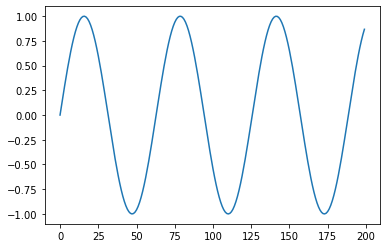

In [66]:
plt.plot(series)

In [67]:
T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)

print(X[0])
print(Y[0])

[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]
0.8414709848078965


In [68]:
X=np.array(X).reshape(-1,T,1) ##To keep data in N x T x D
Y=np.array(Y)
N=len(X)
print(f'X shape {X.shape} and Y Shape {Y.shape}')

X shape (190, 10, 1) and Y Shape (190,)


In [69]:
model= Sequential()

model.add(Input(shape=(T,1)))

model.add(SimpleRNN(15,activation='relu'))

model.add(Dense(1))

In [70]:


# i =input(shape=(T,))

# x=SimpleRNN(5,activation='relu')(i)



In [71]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))

In [72]:
model.fit(X[:-N//2],Y[:-N//2],epochs=150,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/150
3/3 [==============================] - 2s 208ms/step - loss: 0.8419 - val_loss: 0.0911
Epoch 2/150
3/3 [==============================] - 0s 22ms/step - loss: 0.1316 - val_loss: 0.0588
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.1248 - val_loss: 0.0991
Epoch 4/150
3/3 [==============================] - 0s 44ms/step - loss: 0.0501 - val_loss: 0.0423
Epoch 5/150
3/3 [==============================] - 0s 43ms/step - loss: 0.0573 - val_loss: 0.0630
Epoch 6/150
3/3 [==============================] - 0s 84ms/step - loss: 0.0291 - val_loss: 0.0207
Epoch 7/150
3/3 [==============================] - 0s 43ms/step - loss: 0.0328 - val_loss: 0.0334
Epoch 8/150
3/3 [==============================] - 0s 25ms/step - loss: 0.0211 - val_loss: 0.0035
Epoch 9/150
3/3 [==============================] - 0s 28ms/step - loss: 0.0073 - val_loss: 0.0350
Epoch 10/150
3/3 [==============================] - 0s 38ms/step - loss: 0.0157 - val_loss: 0.0079
Epoch 11/150
3/3 [

<AxesSubplot:>

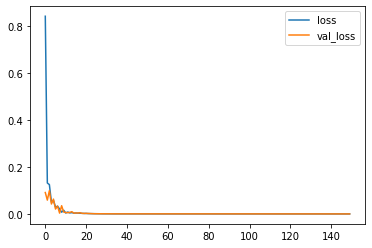

In [73]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [74]:
model= Sequential()

model.add(Input(shape=(T,1)))

model.add(SimpleRNN(15,activation=None))

model.add(Dense(1))

In [75]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
model.fit(X[:-N//2],Y[:-N//2],epochs=150,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/150
3/3 [==============================] - 2s 208ms/step - loss: 34.9097 - val_loss: 13.4927
Epoch 2/150
3/3 [==============================] - 0s 23ms/step - loss: 10.0529 - val_loss: 10.2001
Epoch 3/150
3/3 [==============================] - 0s 20ms/step - loss: 4.5515 - val_loss: 1.2651
Epoch 4/150
3/3 [==============================] - 0s 22ms/step - loss: 41.9273 - val_loss: 427.1485
Epoch 5/150
3/3 [==============================] - 0s 21ms/step - loss: 441.6522 - val_loss: 0.4343
Epoch 6/150
3/3 [==============================] - 0s 21ms/step - loss: 2.1085 - val_loss: 42.0712
Epoch 7/150
3/3 [==============================] - 0s 21ms/step - loss: 51.2564 - val_loss: 58.1358
Epoch 8/150
3/3 [==============================] - 0s 21ms/step - loss: 44.3335 - val_loss: 16.5066
Epoch 9/150
3/3 [==============================] - 0s 21ms/step - loss: 21.9755 - val_loss: 14.3803
Epoch 10/150
3/3 [==============================] - 0s 21ms/step - loss: 9.2049 - val_loss: 9.2763
Ep

<AxesSubplot:>

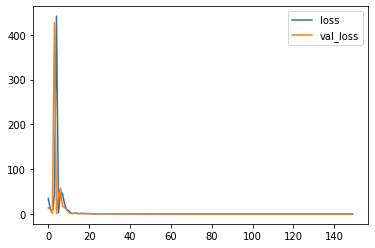

In [76]:
losses=pd.DataFrame(model.history.history)
losses.plot()